In [21]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [22]:
df = pd.read_csv('/content/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [23]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [24]:
df = df.set_index('Day')

In [25]:
df.head(5)

,t
Day,
2008-01-01,0
2008-01-02,-5
2008-01-03,-11
2008-01-04,-11
2008-01-05,-12


In [26]:
g = df.groupby(pd.Grouper(freq="Y")).mean()
type(g.t.max())
print(g.loc[g['t'] == g.t.max()].to_period('Y')) # максимальная темпратура 
print(g.loc[g['t'] == g.t.min()].to_period('Y')) # минимальная температура

             t
Day           
2015  9.079452
             t
Day           
2012  6.980822


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [27]:
df_2 = df.copy()
df = df.loc[df['t'] >= 0]
g = df.groupby(pd.Grouper(freq = 'M')).count()
# Вытащим все январи из сгруппированной таблицы
g['month'] = g.index.month
print(g)
max = g.loc[g['month'] == 1].t.max()
g.loc[(g['month'] == 1) & (g['t'] == max)] 

             t  month
Day                  
2008-01-31  19      1
2008-02-29  19      2
2008-03-31  22      3
2008-04-30  30      4
2008-05-31  30      5
...         ..    ...
2016-08-31  31      8
2016-09-30  30      9
2016-10-31  31     10
2016-11-30  12     11
2016-12-31  18     12

[108 rows x 2 columns]


,t,month
Day,,
2008-01-31,19,1


**3.** В каком году было самое холодное лето (по средней температуре)

In [60]:
g = df_2.groupby(pd.Grouper(freq = 'M')).mean()
g['month'] = g.index.month
mean_temp_sum = g.loc[(g['month'] == 6) | (g['month'] == 7) | (g['month'] == 8) ].groupby(pd.Grouper(freq = 'Y')).mean()
min = mean_temp_sum.t.min()
mean_temp_sum.loc[mean_temp_sum['t'] == min] 

,t,month
Day,,
2008-12-31,18.108244,7


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [63]:
df_2

,t
Day,
2008-01-01,0
2008-01-02,-5
2008-01-03,-11
2008-01-04,-11
2008-01-05,-12
...,...
2016-12-27,1
2016-12-28,-3
2016-12-29,0


In [87]:
df_2['Delta_t'] = df_2['t'] - df_2['t'].shift(1)
max = df_2.Delta_t.max()
print(max)
df_2[df_2.Delta_t == max]

14.0


,t,Delta_t
Day,,
2012-12-27,3,14.0


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

             t   Delta_t
Day                     
2008  8.545205  0.002747
2009  7.610959 -0.024658
2010  7.117808 -0.002740
2011  8.337912  0.027473
2012  6.980822  0.000000
2013  8.728767  0.005479
2014  8.931507 -0.002740
2015  9.079452 -0.013699
2016  7.907104  0.019126


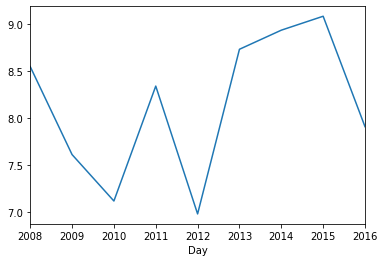

In [105]:
%matplotlib inline
g = df_2.groupby(pd.Grouper(freq = 'Y')).mean().to_period('Y')
g['t'].plot()